In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [63]:
import pandas as pd
from urllib.request import urlopen


## API URL

In [64]:
url = "https://api.opendota.com/api/heroStats"
datos = pd.read_json(url,typ='frame')
print(type(datos))


<class 'pandas.core.frame.DataFrame'>


## Preparacion de datos

In [65]:
columnas = ["id","icon","localized_name", "primary_attr", "attack_type",
             "roles", "base_health", "base_health_regen", "base_mana", "base_mana_regen",
             "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
             "base_agi", "base_int", "str_gain", "agi_gain","int_gain","attack_range",
             "projectile_speed","attack_rate","move_speed","turn_rate"]
datos=datos[columnas].set_index('id')


## Obtener los 5 mejores heroes de rango en base al daño base

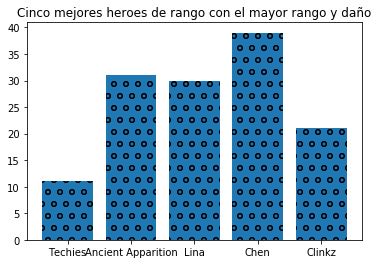

In [79]:

datos_rango=datos[datos['attack_type']=='Ranged']
datos_rango = datos_rango.sort_values(by=['attack_range', 'base_attack_max'], ascending=False)

plt.title("Cinco mejores heroes de rango con el mayor rango y daño")
plt.bar(datos_rango['localized_name'][:5], datos_rango['base_attack_max'][:5],hatch='o')
plt.show()



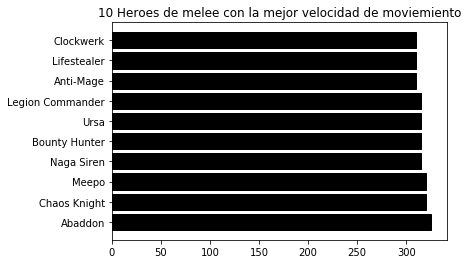

In [96]:
datos_rango=datos[datos['attack_type']=='Melee']

plt.title("10 Heroes de melee con la mejor velocidad de moviemiento")
datos_rango = datos_rango.sort_values(by=['move_speed'], ascending=False)
plt.barh(datos_rango['localized_name'][0:10], datos_rango['move_speed'][0:10],hatch='x',color='k',edgecolor='k')
plt.show()


## Graficar funciones


In [9]:
import math
#metodo para graficar la funcion
def graficar(f,rangemin=-100,rangemax=100,estilo='k.--'):
    x=np.arange(rangemin,rangemax)
    plt.plot(x,[f(i) for i in x],estilo,markevery=40)
    

#metodo de la funcion (x+1)**2 +1 
def f(x):
	r=math.pow(x+1,2)+1 
	return r 

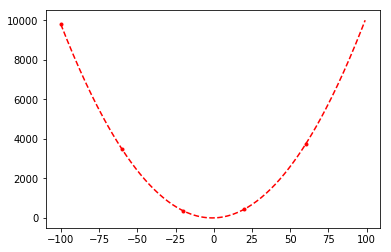

In [11]:
graficar(f,estilo='r.--')

In [6]:
#metodo de la funcion ((x+1)/2)**3 -1 

def f_dos(x):
	r=math.pow((x+1)/2,3)-1 
	return r 

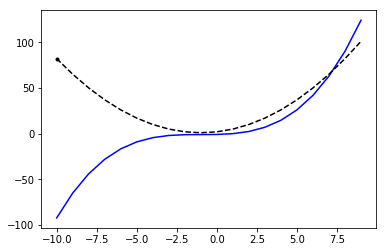

In [13]:
graficar(f_dos,-10,10,estilo='b')
graficar(f,-10,10)

## Funciones Asintotas

In [36]:
def f_tres(x):
	return 1/(x-1)


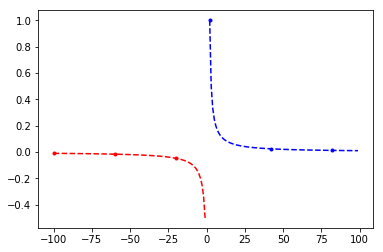

In [37]:
graficar(f_tres,2,100,estilo='b.--')
graficar(f_tres,-100,0,estilo='r.--')
